<div align=center>
<a href='https://mp.weixin.qq.com/mp/appmsgalbum?__biz=Mzg2OTU4NzI3NQ==&action=getalbum&album_id=1764511202329624577&scene=126#wechat_redirect'> 
<img src=https://github.com/datoujinggzj/WhaleDataScienceProject/blob/master/pic/followme_cover.gif?raw=true  width='800'/>
</div>



---

<div align=center>
<a href='https://mp.weixin.qq.com/mp/appmsgalbum?__biz=Mzg2OTU4NzI3NQ==&action=getalbum&album_id=1764511202329624577&scene=126#wechat_redirect'> 
<img src=https://github.com/datoujinggzj/WhaleDataAnalysisProject/blob/master/pic/shanghai.png?raw=true width='400' />
</div>

<div align=center>
<img src=https://github.com/datoujinggzj/WhaleDataScienceProject/blob/master/pic/phase2_eda.png?raw=true width='800' />
</div>

👇👇👇点击可跳转！

[第二阶段：数据处理&数据分析](#第二阶段：数据处理&数据分析)

- [数据处理](#数据处理)
   - 1.1 [中国时序数据处理](#中国时序数据处理)
   - 1.2 [美国时序数据处理](#美国时序数据处理)
   - 1.3 [中美横截面数据处理](#中美横截面数据处理)
- [数据分析](#数据分析)
   - 2.1 [数据质检](#数据质检)
   - 2.2 [数据可视化](#数据可视化)
   - 2.3 [结果分析](#结果分析)

<div class="alert alert-block alert-danger">
<b>注意：</b>

- 需要翻墙才可下载数据和观看油管视频哦！
- 在线看HTML显示不全，请下载到本地操作哦！
- 记得解锁代码再去run哦！
    
</div>

<div class="alert alert-block alert-warning">
<b>【上海新冠疫情数据分析】项目日志</b>

第二阶段：【数据处理&数据分析】
    
第二节阶段核心目的：数据清洗、处理以及转化，以及数据质检及可视化的相关步骤，最后带大家解释结果。
    
难度（最高5星）：⭐⭐⭐

Good Luck!
</div>


# 第二阶段：数据处理&数据分析

In [1]:
# import packages

# data processing
import pandas as pd
import numpy as np
from datetime import timedelta, datetime


import re

# data visualization
from tabulate import tabulate
import plotly.graph_objs as go
from plotly.graph_objs import Bar, Layout
from plotly import offline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

# change text color
import colorama
from colorama import Fore, Style

# IPython
from IPython.display import IFrame

## 数据处理

首先，我们要处理上一阶段得到的时间序列、横截面数据。

时间序列数据：

- time_series_covid19_confirmed_US.csv
- time_series_covid19_confirmed_global.csv
- time_series_covid19_deaths_US.csv
- time_series_covid19_deaths_global.csv
- time_series_covid19_recovered_global.csv

横截面数据：

- csse_covid_19_daily_reports
- csse_covid_19_daily_reports_us

正在读取【横截面】数据......
读取完毕
正在读取【时间序列】数据......
读取完毕
正在获取并处理【上海】数据（数据来自上海卫健委）......
读取完毕


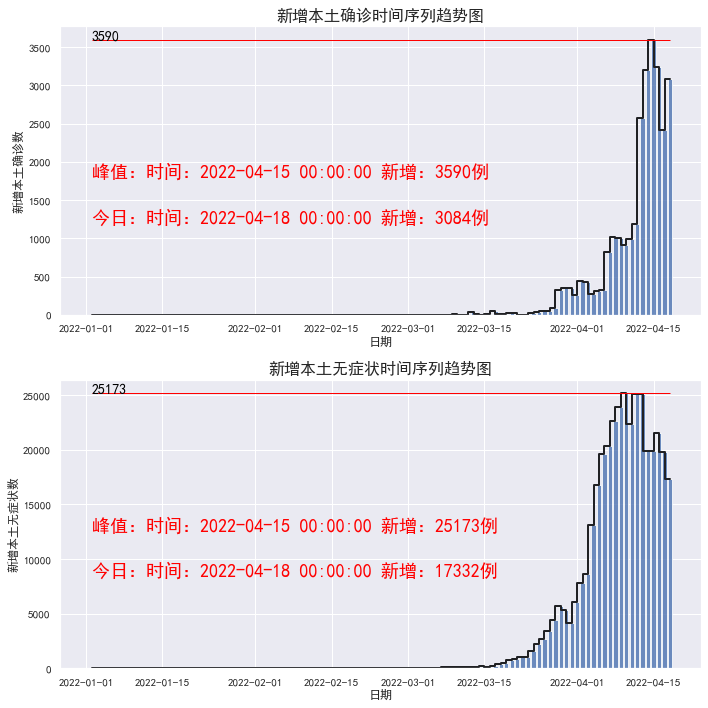

In [2]:
from getdata import GET_csse_covid_19_daily_reports,GET_csse_covid_19_time_series,GET_shanghai_data

# get data
latest_data_global,prev_data_global,latest_data_us,prev_data_us = GET_csse_covid_19_daily_reports()
ts_confirmed_us,ts_confirmed_global,ts_deaths_us,ts_deaths_global,ts_recovered_global = GET_csse_covid_19_time_series()
ts_shanghai_covid = GET_shanghai_data(data_name = 'ts_shanghai_covid', plot=True)  # 这里包含近10天的上海无症状新增趋势！

### 中国时序数据处理

我们先来看看爬取的数据是什么样子的！先看国际的时间序列数据：ts_confirmed_global。

<div class="alert alert-block alert-success"><b>Step 1 Check the Data</b>

检查前五行数据并说明各个字段的含义，关于如何转化以时间为索引的数据框，你有什么想法？

</div>

In [3]:
ts_confirmed_global.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  4/9/22  4/10/22  4/11/22  4/12/22  \
0        0        0        0        0  ...  177974   177974   178141   178257   
1        0        0        0        0  ...  274191   274219   274219   274272   
2        0        0        0        0  ...  265720   265724   265727   265730   
3        0        0        0        0  ...   40328    40328    40328    40328   
4        0        0        0        0  ...   99194    99194    99194    99194   

   4/13/22  4/14/22  4/15/22  4/16/22  4/17/22  4/18/22  
0   178295   178352   178373   178387   178418   178457  
1   274320   274376   274429   274462   274504   274520  
2   265731   265733   265738   265739   265739   265741  
3    40709    40709    40709    40709    40709    40709  
4    99194    99194    99194    99194    99194    99194  

[5 rows x 822 columns]

可以看出，我们可以根据Country/Region筛选出China的所有数据，并且我们需要把横着的日期，转换成竖着的，是不是可以试试【转置】呢？

In [4]:
data1 = ts_confirmed_global.copy() # 不要原地操作，记得copy
# （1）Country/Region筛选出China的所有数据
data1 = data1[data1['Country/Region'] == 'China']
# （2）把Province/State设置成index
data1 = data1.set_index('Province/State')
# （3）'Country/Region','Lat','Long' 去除这三列，我们暂时不要。
data1 = data1.drop(['Country/Region','Lat','Long'],axis=1)
# （4）通过累计数计算新增数，也就是横着看，后一天的减去前一天的

### 1. axis=1 表示横着减
### 2. fillna 是因为后面的减去前一个，那么第一个值就会变成NaN，所以需要填充，我们填充为第一列本来的值即可
### 3. 在填充之后，为了保留原始数据类型，省着你用.astype再去转换，这里用downcast = 'infer'，具体见下方视频！

######## 重要！########
# .clip(lower=0) 是否加在最后面，取决于我们是否负略负增长，就是会存在你算出的difference是负值，这一句代码就会把所有负值换成0。
data1 = data1.diff(axis=1).fillna({data1.columns[0]:data1[data1.columns[0]]},downcast = 'infer') # .clip(lower=0)


# （5）我们按照最后一天(也就是最新一天)的新增从小到大排列，使用sort_values，根据data的最后一列的值，倒序排列即可。
data1 = data1.sort_values(by = data1.columns[-1],ascending=False)
# （6）转置（相当于90度大翻转）
data1 = data1.T
# （7）去除 Unknown 这一列，因为这时候index和column互换了，原先的index是Province/State，这里存在缺失值（估计是台湾？）叫做Unknown，去掉它。
data1 = data1.dropna().drop('Unknown',axis=1)
# （8）时间转换，此时，我们需要把时间用 pd.to_datetime 进行转换！You are almost there! 加油！
data1.index = pd.to_datetime(data1.index)
# （9）去除columns name

data1.columns.name = ''

ts_data_processed = data1
# 现在我们来看看处理好的数据！

# ts_data_processed 
# 解锁！

<div align=center>
<img src=https://github.com/datoujinggzj/WhaleDataScienceProject/blob/master/pic/perfect.jpg?raw=true width='200' />
</div>

<div class="alert alert-block alert-danger">
<b>注意：</b>

不了解fillna的话可以看一下我的小红书视频哦（下方），第9分钟讲解了参数 `downcast`。
    
</div>

In [5]:
IFrame(width="853",height="480",src = "http://v.xiaohongshu.com/01e24207c120206a018370037fd1f059f3_259.mp4?sign=37a8d60e55321232bf15b219c5feb573&t=62617f80")

In [6]:
def ts_process_CHINA(ts_data,clip = False):
    ts_data = ts_data[ts_data['Country/Region'] == 'China']
    # get loc
    loc_data = ts_data[['Province/State','Lat','Long']]
    loc_data = loc_data[loc_data['Province/State'] != 'Unknown']

    ts_data = ts_data.set_index('Province/State').drop(['Country/Region','Lat','Long'],axis=1)
    if clip:
        ts_data = ts_data.diff(axis=1).fillna({ts_data.columns[0]:ts_data[ts_data.columns[0]]},downcast = 'infer').clip(lower=0)
    else:
        ts_data = ts_data.diff(axis=1).fillna({ts_data.columns[0]:ts_data[ts_data.columns[0]]},downcast = 'infer')
    ts_data = ts_data.sort_values(by = ts_data.columns[-1],ascending=False)
    ts_data = ts_data.T.dropna().drop('Unknown',axis=1)
    ts_data.index = pd.to_datetime(ts_data.index)
    ts_data.columns.name = ''
    sorted_provinces = ts_data.columns
    return ts_data,loc_data,sorted_provinces #### loc_data,sorted_provinces 这两个输出先忽略

同理我们是不是可以再去对美国的数据也进行这样的处理呢？交给你吧！

### 美国时序数据处理

In [7]:
ts_confirmed_us.head()

UID iso2 iso3  code3    FIPS   Admin2 Province_State Country_Region  \
0  84001001   US  USA    840  1001.0  Autauga        Alabama             US   
1  84001003   US  USA    840  1003.0  Baldwin        Alabama             US   
2  84001005   US  USA    840  1005.0  Barbour        Alabama             US   
3  84001007   US  USA    840  1007.0     Bibb        Alabama             US   
4  84001009   US  USA    840  1009.0   Blount        Alabama             US   

         Lat      Long_  ... 4/9/22  4/10/22  4/11/22  4/12/22  4/13/22  \
0  32.539527 -86.644082  ...  15744    15744    15747    15749    15751   
1  30.727750 -87.722071  ...  55489    55489    55499    55512    55522   
2  31.868263 -85.387129  ...   5658     5658     5658     5658     5658   
3  32.996421 -87.125115  ...   6422     6422     6425     6425     6425   
4  33.982109 -86.567906  ...  14929    14929    14934    14934    14935   

   4/14/22  4/15/22  4/16/22  4/17/22  4/18/22  
0    15751    15752    15752    15752    15771  
1    55536    55547    55547    55547    55579  
2     5658     5658     5658     5658     5659  
3     6428     6428     6428     6428     6428  
4    14953    14959    14959    14959    14963  

[5 rows x 829 columns]

可以看到，美国的数据比国际的数据要复杂不少，多了一些维度！

<div class="alert alert-block alert-success"><b>Step 2 Process the US ts Data</b>

处理美国的时间序列数据，参考上方教程！
    
注意：美国的数据计算到了county层面，我们不需要这么详细，我们统计到state即可，就是group by state并且sum所有的case即可。
    
【Question】写一个函数，输入为ts_data，当death是True时，我们处理的为ts_deaths_us（结构和ts_confirmed_us有区别！），clip默认为False，因为我们允许负增长的出现！

你的函数应该使用于以下数据：
    
- ts_confirmed_us
- ts_deaths_us

</div>

供参考👇👇👇

In [8]:
def ts_process_US(ts_data, death = False, clip = False):
    # get loc
    ts_data = ts_data.dropna()
    loc_data = ts_data[['UID','FIPS','Admin2','Province_State','Lat','Long_']]

    ts_data = ts_data.set_index(['Province_State','Admin2']).iloc[:,9:]
    if death:
        population = ts_data.groupby('Province_State')['Population'].sum()
        ts_data = ts_data.drop('Population',axis=1)

    if clip:
        ts_data = ts_data.diff(axis=1).fillna({ts_data.columns[0]:ts_data[ts_data.columns[0]]},downcast = 'infer').clip(lower=0)
    else:
        ts_data = ts_data.diff(axis=1).fillna({ts_data.columns[0]:ts_data[ts_data.columns[0]]},downcast = 'infer')
    ts_data = ts_data.groupby('Province_State').sum()
    ts_data = ts_data.sort_values(by = ts_data.columns[-1],ascending=False)
    ts_data = ts_data.T
    ts_data.index = pd.to_datetime(ts_data.index)
    ts_data.columns.name = ''

    sorted_state = ts_data.columns

    if death:
        return ts_data,loc_data,sorted_state,population
    return ts_data,loc_data,sorted_state

<div align=center>
<img src=https://github.com/datoujinggzj/WhaleDataScienceProject/blob/master/pic/good.gif?raw=true width='200' />
</div>

下面，我们再继续处理横截面数据！

### 中美横截面数据处理

我们以最新的全球横截面数据做例子 latest_data_global

In [9]:
latest_data_global.head()

FIPS Admin2 Province_State Country_Region          Last_Update       Lat  \
0   NaN    NaN            NaN    Afghanistan  2022-04-19 04:21:00  33.93911   
1   NaN    NaN            NaN        Albania  2022-04-19 04:21:00  41.15330   
2   NaN    NaN            NaN        Algeria  2022-04-19 04:21:00  28.03390   
3   NaN    NaN            NaN        Andorra  2022-04-19 04:21:00  42.50630   
4   NaN    NaN            NaN         Angola  2022-04-19 04:21:00 -11.20270   

       Long_  Confirmed  Deaths  Recovered  Active Combined_Key  \
0  67.709953     178457    7679        NaN     NaN  Afghanistan   
1  20.168300     274520    3496        NaN     NaN      Albania   
2   1.659600     265741    6874        NaN     NaN      Algeria   
3   1.521800      40709     153        NaN     NaN      Andorra   
4  17.873900      99194    1900        NaN     NaN       Angola   

   Incident_Rate  Case_Fatality_Ratio  
0     458.424365             4.302997  
1    9539.231357             1.273496  
2     606.008391             2.586729  
3   52687.504045             0.375838  
4     301.810963             1.915438

这里，我们需要提取中国和美国的横截面数据，需要的字段是：

'Province_State',
'Last_Update',
'Confirmed',
'Deaths',
'Incident_Rate',
'Case_Fatality_Ratio'

index是各省或各州

大家可以尝试一下！

<div class="alert alert-block alert-success"><b>Step 3 Process the Cross Sectional Data</b>

处理中美的横截面数据，参考上方说明！
    
country 为 'China'，要先在全球数据中摘取中国数据，并去除Unknown！

</div>

In [10]:
def daily_process(daily_data, country = 'China'):
    if country == 'China':
        daily_data = daily_data[(daily_data['Country_Region'] == 'China')&(daily_data['Province_State']!='Unknown')]
    elif country == 'US':
        daily_data = daily_data
    cols_use = ['Province_State','Last_Update','Confirmed','Deaths','Incident_Rate','Case_Fatality_Ratio']

    # sorted_provinces is provided
    daily_data_processed = daily_data[cols_use].set_index(daily_data['Province_State'])
    daily_data_processed.index.name = ""
    daily_data_processed = daily_data_processed.dropna()
    return daily_data_processed

In [11]:
# daily_process(latest_data_global, country = 'China')

# unlock the code above to check the answer!

现在，我们再把所有的函数写入一个模块，叫做：data_processing。

In [12]:
from data_processing import ts_process_CHINA,ts_process_US,daily_process

In [13]:
ts_confirmed_CHINA_incre, loc_data_CHINA, sorted_provinces = ts_process_CHINA(ts_confirmed_global,clip=False)
ts_deaths_CHINA_incre, _, _ = ts_process_CHINA(ts_deaths_global,clip=False)
ts_recovered_CHINA_incre, _, _ = ts_process_CHINA(ts_recovered_global,clip=False)

In [14]:
ts_confirmed_US_incre,loc_data_us,sorted_state = ts_process_US(ts_confirmed_us,clip=False)
ts_deaths_US_incre,_,_,population = ts_process_US(ts_deaths_us,death = True,clip=False)

In [15]:
latest_data_CHINA = daily_process(latest_data_global, country = 'China')
prev_data_CHINA = daily_process(prev_data_global, country = 'China')
latest_data_US = daily_process(latest_data_us, country = 'US')
prev_data_US = daily_process(prev_data_us, country = 'US')

<div align=center>
<img src=https://github.com/datoujinggzj/WhaleDataScienceProject/blob/master/pic/sep.gif?raw=true width='800' />
</div>

## 数据分析

下面，我们来继续数据分析的部分。


那么我们要先进行一下数据的质量检查，准确无误后，正式开始数据可视化部分！

### 数据质检

由于已经设置了clip=False，说明我们考虑负增长的情况，来看看什么是否发生了负增长吧！

In [16]:
neg_incre_date_CHINA = []
neg_incre_province_CHINA = []
neg_incre_number_CHINA = []
for r,c in sorted(zip(np.where(ts_confirmed_CHINA_incre<0)[0],np.where(ts_confirmed_CHINA_incre<0)[1]),key = lambda x: x[0],reverse=True):
    neg_incre_date_CHINA.append(str(ts_confirmed_CHINA_incre.index[r]))
    neg_incre_province_CHINA.append(ts_confirmed_CHINA_incre.columns[c])
    neg_incre_number_CHINA.append(ts_confirmed_CHINA_incre.iloc[r,c])

In [17]:
print(tabulate(sorted(zip(neg_incre_date_CHINA,
                   neg_incre_province_CHINA,
                   neg_incre_number_CHINA),key = lambda x: abs(x[2]),reverse = True),
              headers = ['负增长日期','发生地点','数量'],tablefmt = 'pretty'))

+---------------------+--------------+------+
|     负增长日期      |   发生地点   | 数量 |
+---------------------+--------------+------+
| 2021-10-09 00:00:00 |  Hong Kong   | -23  |
| 2022-04-15 00:00:00 |    Yunnan    | -12  |
| 2020-06-03 00:00:00 |   Jiangxi    |  -5  |
| 2021-10-14 00:00:00 | Heilongjiang |  -4  |
| 2022-02-09 00:00:00 |   Liaoning   |  -1  |
| 2021-10-14 00:00:00 |    Hebei     |  -1  |
| 2021-09-03 00:00:00 |  Hong Kong   |  -1  |
| 2021-06-28 00:00:00 |   Beijing    |  -1  |
| 2020-10-25 00:00:00 |   Shaanxi    |  -1  |
| 2020-03-18 00:00:00 |   Guizhou    |  -1  |
+---------------------+--------------+------+


可以看到，2021年10月9日，香港发生了最大幅度的负增长，也就是说治愈人数超过了感染人数23人。那么我们再来看看美国的吧！

In [18]:
neg_incre_date_US = []
neg_incre_province_US = []
neg_incre_number_US = []
for r,c in sorted(zip(np.where(ts_confirmed_US_incre<0)[0],np.where(ts_confirmed_US_incre<0)[1]),key = lambda x: x[0],reverse=True):
    neg_incre_date_US.append(str(ts_confirmed_US_incre.index[r]))
    neg_incre_province_US.append(ts_confirmed_US_incre.columns[c])
    neg_incre_number_US.append(ts_confirmed_US_incre.iloc[r,c])
    
    
print(tabulate(sorted(zip(neg_incre_date_US,
                   neg_incre_province_US,
                   neg_incre_number_US),key = lambda x: abs(x[2]),reverse = True),
              headers = ['负增长日期','发生地点','数量'],tablefmt = 'pretty'))

+---------------------+----------------------+--------+
|     负增长日期      |       发生地点       |  数量  |
+---------------------+----------------------+--------+
| 2022-04-13 00:00:00 |        Texas         | -10061 |
| 2022-04-04 00:00:00 |        Texas         | -9063  |
| 2021-04-26 00:00:00 |      New Jersey      | -9005  |
| 2022-01-26 00:00:00 |       Alabama        | -8780  |
| 2021-04-17 00:00:00 |       Missouri       | -7698  |
| 2021-03-11 00:00:00 |       Missouri       | -4354  |
| 2022-02-08 00:00:00 |     Pennsylvania     | -4116  |
| 2021-06-29 00:00:00 |      California      | -3937  |
| 2022-01-18 00:00:00 |        Nevada        | -2153  |
| 2020-03-29 00:00:00 |      California      | -2019  |
| 2022-03-22 00:00:00 |       Missouri       | -1543  |
| 2021-09-22 00:00:00 |       Florida        | -1448  |
| 2021-04-06 00:00:00 |       Oklahoma       | -1294  |
| 2022-04-08 00:00:00 |       Delaware       | -1283  |
| 2021-09-22 00:00:00 |     Rhode Island     | -1260  |
| 2

美国负增长的情况就比较多了，尤其是最近的Texas、New Jersey和Missouri等州，都出现了大幅度的负增长，说明这些州在面对奥密克戎的侵袭，已经有了很不错的响应！

那么，请试着写成一个函数吧！

<div class="alert alert-block alert-success"><b>Step 4 Get the detail of negative increments</b>

根据以上内容，请写出一个函数

</div>

In [19]:
def negincre_report(ts_data, sort_by = 0):
    """
    ts_data: time seris data
    sort_by: 0 ==> date
             1 ==> place 
             2 ==> number
    """
    neg_incre_date = []
    neg_incre_province = []
    neg_incre_number = []
    for r,c in sorted(zip(np.where(ts_data<0)[0],np.where(ts_data<0)[1]),key = lambda x: x[0],reverse=True):
        neg_incre_date.append(str(ts_data.index[r]))
        neg_incre_province.append(ts_data.columns[c])
        neg_incre_number.append(ts_data.iloc[r,c])

    recent_date = ts_data.index[np.where(ts_data.sum(axis=1)<0)].format()
    if len(recent_date) != 0:
        recent_date = recent_date[0]
    else:
        recent_date = '无'
        
    print('*'*20 +  'INFO' +  '*'*20)
    print(f"全国负增长的日期：{recent_date}")
    
    print('*'*20 +  'REPORT' +  '*'*20)
    print(tabulate(sorted(zip(neg_incre_date,
                       neg_incre_province,
                       neg_incre_number),key = lambda x: abs(x[sort_by]) if sort_by == 2 else x[sort_by],reverse = True),
                  headers = ['负增长日期','发生地点','数量'],tablefmt = 'pretty'))



很诡异的是，竟然新增死亡数也是可以是负数，确实厉害！

In [20]:
# negincre_report(ts_deaths_US_incre,sort_by=2)
# 解锁

In [21]:
def dataQC(data):
    # basic info
    print(f"总行数：{Fore.RED}{data.shape[0]}{Style.RESET_ALL}")
    print(f"总列数：{Fore.RED}{data.shape[1]}{Style.RESET_ALL}")
    print(f"总元素数：{data.size}")
    print('-'*50+ f"{Fore.RED}INFO{Style.RESET_ALL}"  + '-'*50)
    print('【基本信息】')
    data.info()

In [22]:
dataQC(latest_data_CHINA)

总行数：33
总列数：6
总元素数：198
--------------------------------------------------INFO--------------------------------------------------
【基本信息】
<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, Anhui to Zhejiang
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Province_State       33 non-null     object 
 1   Last_Update          33 non-null     object 
 2   Confirmed            33 non-null     int64  
 3   Deaths               33 non-null     int64  
 4   Incident_Rate        33 non-null     float64
 5   Case_Fatality_Ratio  33 non-null     float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ KB


### 数据可视化

下面我们来进行数据可视化，为什么要数据可视化呢？

数据的可视化展示,提高了解释信息的能力。从海量的数据和信息中寻找联系并不容易，但是图形和图表可以在几秒内提供信息。一望便知，可提供所需的信息。

以上所述,能提高在工作场所或教育机构的沟通和有效性。数据可视化被普遍认为是一种简单而有效的方法来概括数据，因此它是可以提高人们的共享信息和学习的一种方法。

这里需要大家掌握三个可视化包

（👇👇👇点击链接，进入对应模块学习哦！）

- [Matplotlib](https://gitee.com/gzjzg/WhaleDataScienceProject/tree/master/porto-seguro-safe-driver-prediction/Phase2/Matplotlib)
- [Seaborn](https://gitee.com/gzjzg/WhaleDataScienceProject/tree/master/porto-seguro-safe-driver-prediction/Phase3/Seaborn)
- [Plotly](https://zg104.github.io/Plotly)

In [23]:
IFrame(width="853",height="480",src = "https://www.youtube.com/embed/87jyeklhTH8")

现在，我们来绘制中国各个省的疫情时间序列趋势图。

并加上7天移动平均和30天移动平均曲线。

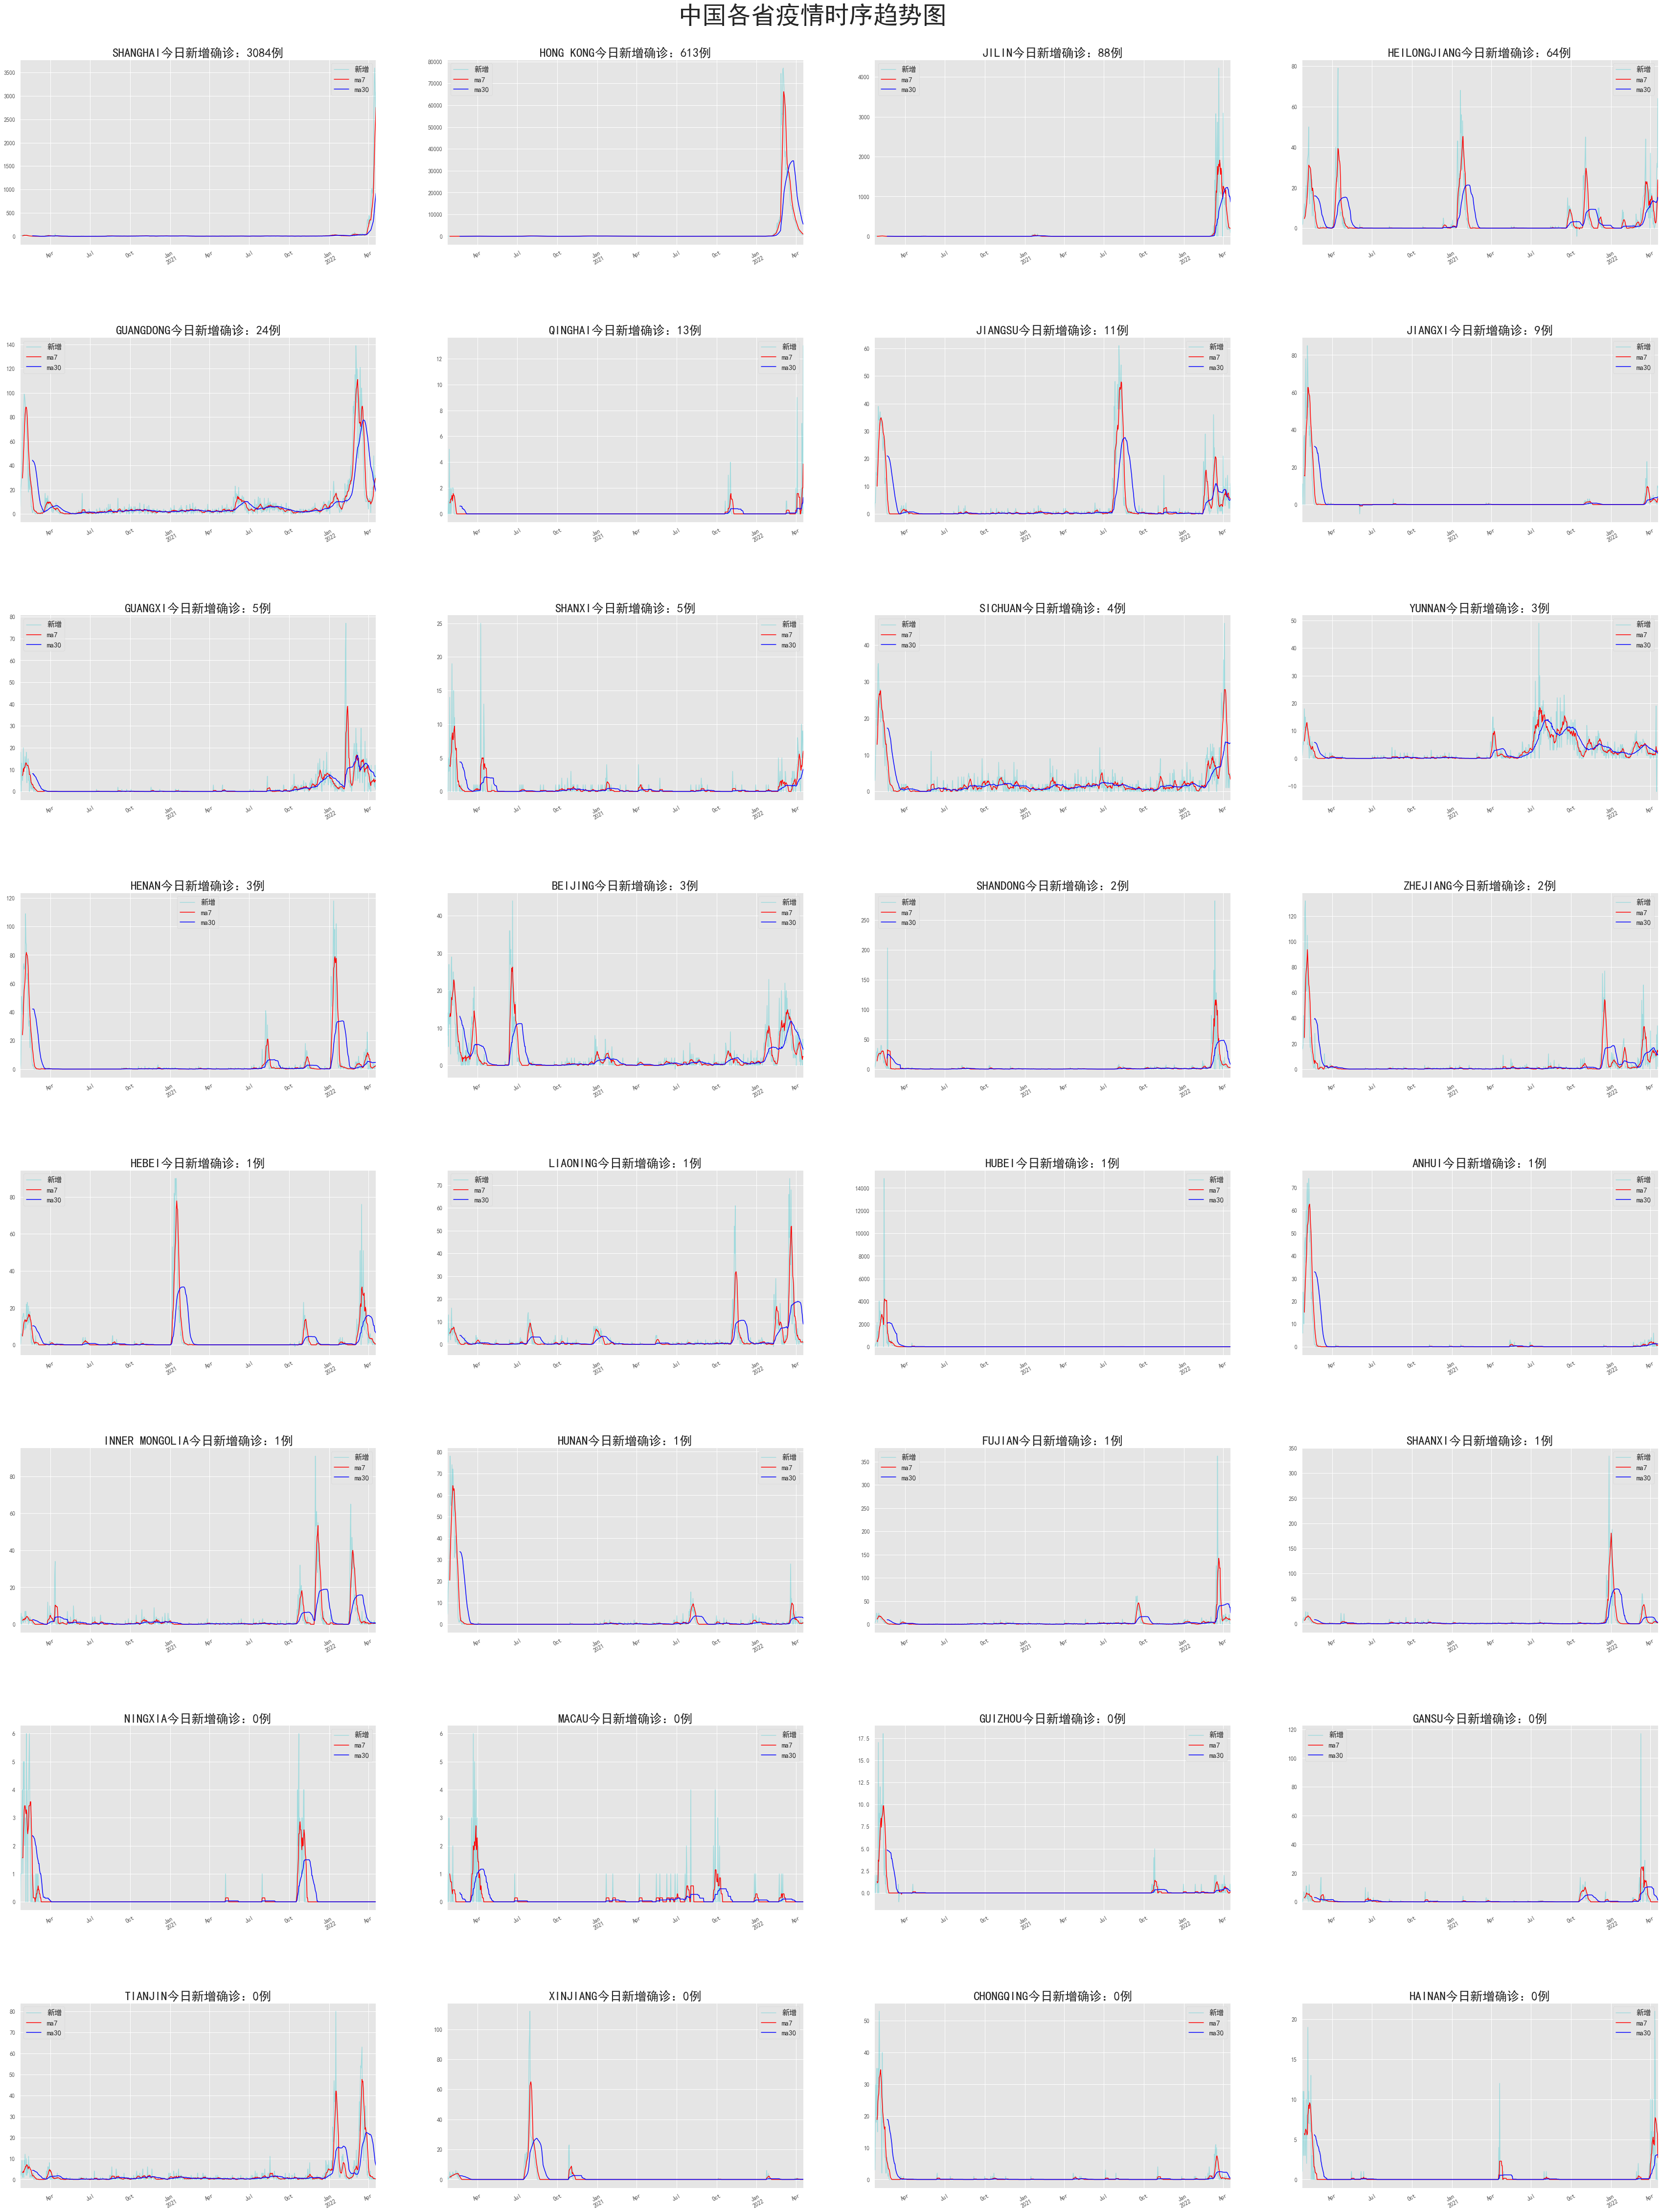

In [24]:
country = '中国'
ma = [7,30]
method = '新增'
kind = '确诊'



data_copy = ts_confirmed_CHINA_incre.copy()
data_copy = data_copy.drop(['Tibet'],axis=1).sort_values(axis=1, by =data_copy.index[-1],ascending=False)
plt.style.use('ggplot')
fig, axs = plt.subplots(nrows=8, ncols=4, figsize=(15*4, 10*8))
plt.subplots_adjust(hspace=0.5)
plt.suptitle(f"{country}各省疫情时序趋势图", fontsize=50, y = 0.9)
for province,ax in zip(data_copy.columns, axs.ravel()):
    data_copy[province].plot(ax=ax,rot = 30, fontsize = 12,alpha = .3, label = method, color = '#06c3cc')
    data_copy[province].rolling(ma[0]).mean().plot(ax=ax,rot = 30, fontsize = 12,label = f'ma{ma[0]}',color = 'red')
    data_copy[province].rolling(ma[1]).mean().plot(ax=ax,rot = 30, fontsize = 12,label = f'ma{ma[1]}',color = 'blue')
    ax.set_title(f"{province.upper()}今日新增{kind}：{int(data_copy[province].tail(1))}例",fontsize = 25)
    ax.legend(fontsize = 15)
    ax.set_xlabel("")
plt.show()

<div class="alert alert-block alert-success"><b>Step 5 Plot US TS Trends by State</b>
    
现在，请尝试根据上面代码，利用 ts_confirmed_US_incre 绘制一个美国各州的疫情时序趋势图吧！
</div>

现在，我们把眼光放在某个具体的省或者州上，我们着重研究上海的数据，那么这时最好采用plotly，可以实现交互式可视化！

In [25]:
# data_copy1 = ts_confirmed_US_incre

# specify = 'New York'
# idx = data_copy1.index
# ser = data_copy1[specify]
# layout_title = specify.upper()
# kind = '确诊'
# method = '新增'
# ma = [7,30]

# trace = go.Scatter(
#             x = idx,
#             y = ser,
#             mode = 'lines+markers',
#             name = f'{method}{kind}数',
#             opacity = .8,
#             line=dict(color="#08a8c4",width = .4),
#             marker = dict(color = '#5857e1',size = 1.2)
#         )
# trace1 = go.Scatter(
#     x = idx,
#     y = ser.rolling(ma[0]).mean(),
#     mode = 'lines+markers',
#     name = f'{ma[0]}天移动平均',
#     opacity = .6,
#     line=dict(color="#ee5090",width = 1.4),
#     marker = dict(color = '#dd001b',size = 2.2)
# )
# trace2 = go.Scatter(
#     x = idx,
#     y = ser.rolling(ma[1]).mean(),
#     mode = 'lines+markers',
#     name = f'{ma[1]}天移动平均',
#     opacity = .8,
#     line=dict(color="#006eff",width = 2.4),
#     marker = dict(color = '#412b63',size = 3.2)
# )


# plotdata = [trace,trace1,trace2]

# '''启动绘图'''

# x_axis_config = {'title': '日期'}
# y_axis_config = {'title': f'{kind}数（{method.upper()}）'}
# # 返回指定的图像布局和配置对象
# my_layout = Layout(title=f"【{layout_title}】近日【{kind}】数时间序列折线图（{method.upper()}）",
#                    xaxis=x_axis_config, yaxis=y_axis_config)
# # 生成图表
# offline.iplot({'data': plotdata, 'layout': my_layout}, filename=f'{layout_title}_COVID_TS',image_height=500,image_width=1000,image = 'png')

当然，我知道这个代码挺长的，第一次上手的话，可能看的不是很懂，听鲸鲸一句劝，要懂得照葫芦画瓢。

Python画图和咱们用笔画画是一样的，这里有三条线，那么就是3个trace，每个都代表一条线。

然后再把3条线画到一个图里，bingo！

<div class="alert alert-block alert-success"><b>Step 6 Plot Shanghai TS Trend Using Plotly</b>
    
现在，请尝试根据上面代码，利用 ts_confirmed_CHINA_incre 绘制一个上海的疫情时序趋势图吧！（使用Plotly）
</div>

<div class="alert alert-block alert-danger">
<b>注意：</b>

以上的三个获取数据的函数，我写在一个python模块中，叫做`getdata`。
    
大家在直接调用`getdata.py`文件即可！
    
</div>

In [26]:
# data_copy1 = ts_confirmed_CHINA_incre

# specify = 'Shanghai'
# idx = data_copy1.index
# ser = data_copy1[specify]
# layout_title = specify.upper()
# kind = '确诊'
# method = '新增'
# ma = [7,30]

# trace = go.Scatter(
#             x = idx,
#             y = ser,
#             mode = 'lines+markers',
#             name = f'{method}{kind}数',
#             opacity = .8,
#             line=dict(color="#08a8c4",width = .4),
#             marker = dict(color = '#5857e1',size = 1.2)
#         )
# trace1 = go.Scatter(
#     x = idx,
#     y = ser.rolling(ma[0]).mean(),
#     mode = 'lines+markers',
#     name = f'{ma[0]}天移动平均',
#     opacity = .6,
#     line=dict(color="#ee5090",width = 1.4),
#     marker = dict(color = '#dd001b',size = 2.2)
# )
# trace2 = go.Scatter(
#     x = idx,
#     y = ser.rolling(ma[1]).mean(),
#     mode = 'lines+markers',
#     name = f'{ma[1]}天移动平均',
#     opacity = .8,
#     line=dict(color="#006eff",width = 2.4),
#     marker = dict(color = '#412b63',size = 3.2)
# )


# plotdata = [trace,trace1,trace2]

# '''启动绘图'''

# x_axis_config = {'title': '日期'}
# y_axis_config = {'title': f'{kind}数（{method.upper()}）'}
# # 返回指定的图像布局和配置对象
# my_layout = Layout(title=f"【{layout_title}】近日【{kind}】数时间序列折线图（{method.upper()}）",
#                    xaxis=x_axis_config, yaxis=y_axis_config)
# # 生成图表
# offline.iplot({'data': plotdata, 'layout': my_layout}, filename=f'{layout_title}_COVID_TS',image_height=500,image_width=1000,image = 'png')

### 结果分析

大家做数据分析的过程中，很容易注重过程，却忽视了结果。

恰恰相反，领导眼里，我们怎么实现的他并不关注，他关注的这一大堆有的没的到底能量化给到一个什么样的结果。

这个结果是否满足下列条件：

1. 合理
2. 有效
3. 可行

所以，我们来看看根据这些数据，我们能得到什么结果。


先来看看中国自疫情以来，整个疫情的发展趋势和重要节点

In [27]:
# data_copy1 = ts_confirmed_CHINA_incre

# specify = '中国'
# idx = data_copy1.index
# ser = data_copy1.sum(axis=1)
# layout_title = specify.upper()
# kind = '确诊'
# method = '新增'
# ma = [7,30]

# trace = go.Scatter(
#             x = idx,
#             y = ser,
#             mode = 'lines+markers',
#             name = f'{method}{kind}数',
#             opacity = .8,
#             line=dict(color="#08a8c4",width = .4),
#             marker = dict(color = '#5857e1',size = 1.2)
#         )
# trace1 = go.Scatter(
#     x = idx,
#     y = ser.rolling(ma[0]).mean(),
#     mode = 'lines+markers',
#     name = f'{ma[0]}天移动平均',
#     opacity = .6,
#     line=dict(color="#ee5090",width = 1.4),
#     marker = dict(color = '#dd001b',size = 2.2)
# )
# trace2 = go.Scatter(
#     x = idx,
#     y = ser.rolling(ma[1]).mean(),
#     mode = 'lines+markers',
#     name = f'{ma[1]}天移动平均',
#     opacity = .8,
#     line=dict(color="#006eff",width = 2.4),
#     marker = dict(color = '#412b63',size = 3.2)
# )


# plotdata = [trace,trace1,trace2]

# '''启动绘图'''

# x_axis_config = {'title': '日期'}
# y_axis_config = {'title': f'{kind}数（{method.upper()}）'}
# # 返回指定的图像布局和配置对象
# my_layout = Layout(title=f"【{layout_title}】近日【{kind}】数时间序列折线图（{method.upper()}）",
#                    xaxis=x_axis_config, yaxis=y_axis_config)
# # 生成图表
# offline.iplot({'data': plotdata, 'layout': my_layout}, filename=f'{layout_title}_COVID_TS',image_height=500,image_width=1000,image = 'png')

上面这个图来看，好像在22年的2月3月左右出现了一波暴增，那是因为咱们香港不听话，非得摆烂，学英国那一套，直接把自己玩崩了，这曲线着实吓人。

那么，我们把香港先排除在外，看看大陆的趋势如何。

In [28]:
data_copy1 = ts_confirmed_CHINA_incre

specify = '中国大陆'
idx = data_copy1.index
ser = data_copy1.drop('Hong Kong',axis=1).sum(axis=1)
layout_title = specify.upper()
kind = '确诊'
method = '新增'
ma = [7,30]

trace = go.Scatter(
            x = idx,
            y = ser,
            mode = 'lines+markers',
            name = f'{method}{kind}数',
            opacity = .8,
            line=dict(color="#08a8c4",width = .4),
            marker = dict(color = '#5857e1',size = 1.2)
        )
trace1 = go.Scatter(
    x = idx,
    y = ser.rolling(ma[0]).mean(),
    mode = 'lines+markers',
    name = f'{ma[0]}天移动平均',
    opacity = .6,
    line=dict(color="#ee5090",width = 1.4),
    marker = dict(color = '#dd001b',size = 2.2)
)
trace2 = go.Scatter(
    x = idx,
    y = ser.rolling(ma[1]).mean(),
    mode = 'lines+markers',
    name = f'{ma[1]}天移动平均',
    opacity = .8,
    line=dict(color="#006eff",width = 2.4),
    marker = dict(color = '#412b63',size = 3.2)
)



plotdata = [trace,trace1,trace2]

'''启动绘图'''

x_axis_config = {'title': '日期'}
y_axis_config = {'title': f'{kind}数（{method.upper()}）'}
# 返回指定的图像布局和配置对象
my_layout = Layout(title=f"【{layout_title}】近日【{kind}】数时间序列折线图（{method.upper()}）",
                   xaxis=x_axis_config, yaxis=y_axis_config)
# 生成图表
offline.iplot({'data': plotdata, 'layout': my_layout}, filename=f'{layout_title}_COVID_TS',image_height=500,image_width=1000,image = 'png')

这个曲线就比较合理哈，首先是武汉在2020年初爆发了疫情，在2月13那天单日新增确诊15k多，可怕！我们zoom一下，看下具体情况！

但是隔了一天14日那天就单日新增减半，只有6k多，这就是爱的力量么💋

可以看出这一波激增很反常，上的快，下的也快，这说明刚开始的这个毒株传染性极强，而且我们也是控制地非常好，在极短的时间内就把易感人数控制在可控范围之内（估计是封城的原因）。

到了三月，我们日增降至几百，最后到几十，抗疫第一阶段结束，大家开启了持久战，一直到4月17日，出现了一波小的上扬，检查了一下是湖北当天新增了325例，但是当天新闻并没有报道，强调了反弹是发生在黑龙江，确实所报道的数据和我们得到的数据是基本吻合的，黑龙江省确实出现了10个新增。

看一下当天的新闻吧！

（大家在发现异常情况时，要多去找信息去佐证或者推翻我们所利用数据获得的信息，要知道我们所有的分析决策都来自于数据本身，所以数据有问题的话，再怎么分析也都是徒劳！）

In [29]:
IFrame(width="853",height="480",src = "https://player.youku.com/embed/XNDYzODE1MzEzMg==")

可以看到，后面一直到22年初，中国一直保持的很不错，基本日均增加在个位数，并没有被传染性更强的 delta 毒株所严重影响。

> 德尔塔（Delta），是新冠病毒变异毒株。最早于2020年10月在印度发现。2021年5月，世卫组织将最早在印度发现的新冠病毒变异毒株B.1.617.2命名为“德尔塔”变体。

<div align=center>
<img src=https://github.com/datoujinggzj/WhaleDataAnalysisProject/blob/master/pic/china_covid.png?raw=true width='800' />
</div>

<div align=center>
<img src=https://github.com/datoujinggzj/WhaleDataAnalysisProject/blob/master/pic/shanghai_covid.png?raw=true width='800' />
</div>

In [30]:
IFrame(width="853",height="480",src = "https://www.youtube.com/embed/8qB9HRwFTo0")

那我们再来看看漂亮国的数据是不是像中国这么漂亮！

In [31]:
data_copy1 = ts_confirmed_US_incre

specify = '美国'
idx = data_copy1.index
ser = data_copy1.sum(axis=1)
layout_title = specify.upper()
kind = '确诊'
method = '新增'
ma = [7,30]

trace = go.Scatter(
            x = idx,
            y = ser,
            mode = 'lines+markers',
            name = f'{method}{kind}数',
            opacity = .8,
            line=dict(color="#08a8c4",width = .4),
            marker = dict(color = '#5857e1',size = 1.2)
        )
trace1 = go.Scatter(
    x = idx,
    y = ser.rolling(ma[0]).mean(),
    mode = 'lines+markers',
    name = f'{ma[0]}天移动平均',
    opacity = .6,
    line=dict(color="#ee5090",width = 1.4),
    marker = dict(color = '#dd001b',size = 2.2)
)
trace2 = go.Scatter(
    x = idx,
    y = ser.rolling(ma[1]).mean(),
    mode = 'lines+markers',
    name = f'{ma[1]}天移动平均',
    opacity = .8,
    line=dict(color="#006eff",width = 2.4),
    marker = dict(color = '#412b63',size = 3.2)
)


plotdata = [trace,trace1,trace2]

'''启动绘图'''

x_axis_config = {'title': '日期'}
y_axis_config = {'title': f'{kind}数（{method.upper()}）'}
# 返回指定的图像布局和配置对象
my_layout = Layout(title=f"【{layout_title}】近日【{kind}】数时间序列折线图（{method.upper()}）",
                   xaxis=x_axis_config, yaxis=y_axis_config)
# 生成图表
offline.iplot({'data': plotdata, 'layout': my_layout}, filename=f'{layout_title}_COVID_TS',image_height=500,image_width=1000,image = 'png')

<div class="alert alert-block alert-success"><b>Step 7 Plot US TS Deaths Trends</b>
    
请尝试画出美国死亡时序趋势图吧！
</div>

<div align=center>
<img src=https://github.com/datoujinggzj/WhaleDataAnalysisProject/blob/master/pic/us_covid.png?raw=true width='800' />
</div>

但是近日，从2022年3月中旬开始，上海陆续有小区开始进行管控，在仅仅10几天内，上海彻底沦陷。

向大家介绍一下上海的疫情社区管理模式：

1、封控区

病例和无症状感染者的居住地所在小区及活动频繁的周边地区可划为封控区。

病例发病前2天或无症状感染者检测阳性前2天起至隔离管理前，如其对工作地、活动地等区域人员造成传播的可能性较高，且密切接触者、密接的密接追踪判定难度较大，也可将相关区域划为封控区。

封控区可精准划分至小区(自然村组)、楼栋、单元等，实行“区域封闭、足不出户、服务上门"。

2、管控区

病例发病前2天或无症状感染者检测阳性前2天起至隔离管理前，如其对工作地、活动地等区域人员具有一定传播风险，且其密切接触者、密接的密接追踪判定难度较大，将相关区域划为管控区。

管控区可精准划分至小区(自然村组)、楼栋、单元等，实行“人不出区、严禁聚集”。

管控区内发现核酸检测阳性者立即转为封控区。

3、防范区

县(区)内封控区、管控区以外的区域均为防范区。

实行“强化社会面管控，严格限制人员聚集"。

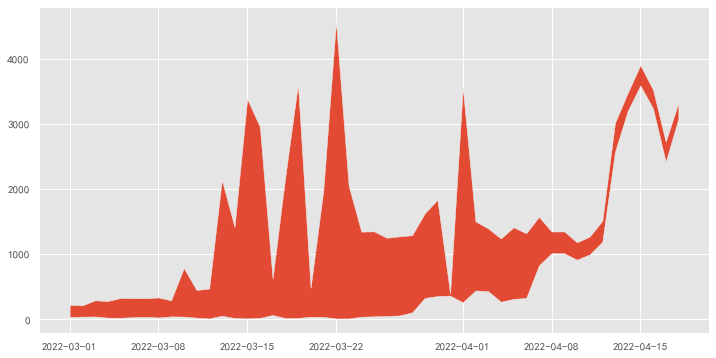

In [32]:
data_copy1 = ts_confirmed_CHINA_incre[ts_confirmed_CHINA_incre.index>='2022-03-01']

specify = '中国大陆 vs. 上海'
idx = data_copy1.index
ser = data_copy1.drop('Hong Kong',axis=1).sum(axis=1)
layout_title = specify.upper()
kind = '确诊'
method = '新增'
ma = [7,30]

trace = go.Scatter(
            x = idx,
            y = ser,
            mode = 'lines+markers',
            name = f'{method}{kind}数',
            opacity = .8,
            line=dict(color="#08a8c4",width = .4),
            marker = dict(color = '#5857e1',size = 1.2)
        )
trace1 = go.Scatter(
    x = idx,
    y = ser.rolling(ma[0]).mean(),
    mode = 'lines+markers',
    name = f'{ma[0]}天移动平均',
    opacity = .6,
    line=dict(color="#ee5090",width = 1.4),
    marker = dict(color = '#dd001b',size = 2.2)
)
trace2 = go.Scatter(
    x = idx,
    y = ser.rolling(ma[1]).mean(),
    mode = 'lines+markers',
    name = f'{ma[1]}天移动平均',
    opacity = .8,
    line=dict(color="#006eff",width = 2.4),
    marker = dict(color = '#412b63',size = 3.2)
)

trace3 = go.Scatter(
    x = idx,
    y = data_copy1['Shanghai'],
    mode = 'lines+markers',
    name = '上海新增数',
    opacity = .8,
    line=dict(color="#f3832c",width = 1.4),
    marker = dict(color = '#d90013',size = 3.2)
)


plotdata = [trace,trace1,trace2,trace3]

'''启动绘图'''

x_axis_config = {'title': '日期'}
y_axis_config = {'title': f'{kind}数（{method.upper()}）'}
# 返回指定的图像布局和配置对象
my_layout = Layout(title=f"【{layout_title}】近日【{kind}】数时间序列折线图（{method.upper()}）2022年3月至今",
                   xaxis=x_axis_config, yaxis=y_axis_config)
# 生成图表
offline.iplot({'data': plotdata, 'layout': my_layout}, filename=f'{layout_title}_COVID_TS',image_height=500,image_width=1000,image = 'png')





data_copy1 = ts_confirmed_CHINA_incre[ts_confirmed_CHINA_incre.index>='2022-03-01']
plt.figure(figsize = [12,6])
plt.fill_between(x = idx, 
                 y1 = data_copy1.drop('Hong Kong',axis=1).sum(axis=1),
                 y2 = data_copy1['Shanghai'],animated=True)

可以看到上海和全国的疫情新增数越来越接近，尤其是4月开始，基本80%到90%的新增数是由上海贡献！

在4月15日达到峰值，并没有发生突破，希望能够迎来真正的拐点！

点击图片有惊喜哦👇👇👇

<div align=center>
<a href='https://mp.weixin.qq.com/mp/appmsgalbum?__biz=Mzg2OTU4NzI3NQ==&action=getalbum&album_id=1764511202329624577&scene=126#wechat_redirect'> 
<img src=https://github.com/datoujinggzj/WhaleDataScienceProject/blob/master/pic/followme.gif?raw=true width='400' />
</div>

<div align=center>
<a href='https://www.xiaohongshu.com/user/profile/6180a092000000001f03501c?xhsshare=CopyLink&appuid=6180a092000000001f03501c&apptime=1650313282'> 
<img src=https://github.com/datoujinggzj/WhaleDataScienceProject/blob/master/pic/followme_xhs.gif?raw=true width = 400/>
</div>